In [19]:

"""
d888888P          oo                            dP              .d888888                                             888888ba                    dP                dP       oo dP oo   dP
   88                                           88             d8'    88                                             88    `8b                   88                88          88      88
   88    88d888b. dP .d8888b. 88d888b. .d8888b. 88 .d8888b.    88aaaaa88a 88d888b. .d8888b. .d8888b.                a88aaaa8P' 88d888b. .d8888b. 88d888b. .d8888b. 88d888b. dP 88 dP d8888P dP    dP
   88    88'  `88 88 88'  `88 88'  `88 88'  `88 88 88ooood8    88     88  88'  `88 88ooood8 88'  `88    88888888     88        88'  `88 88'  `88 88'  `88 88'  `88 88'  `88 88 88 88   88   88    88
   88    88       88 88.  .88 88    88 88.  .88 88 88.  ...    88     88  88       88.  ... 88.  .88                 88        88       88.  .88 88.  .88 88.  .88 88.  .88 88 88 88   88   88.  .88
   dP    dP       dP `88888P8 dP    dP `8888P88 dP `88888P'    88     88  dP       `88888P' `88888P8                 dP        dP       `88888P' 88Y8888' `88888P8 88Y8888' dP dP dP   dP   `8888P88
oooooooooooooooooooooooooooooooooooooooo~~~~.88~ooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo~~~~.88~
                                        d8888P                                                                                                                                               d8888P
"""

import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class style():
        HEADER = lambda i: '\33[30m' + '\33[46m' + str(i) + '  ' + '\33[0m'
        COMPLEMENT = lambda i: '\033[31m' + str(i) + '\33[0m'
        RESET = lambda i: '\33[0m' + str(i)

        
def probability_triangle(maxIter):

        plt.figure(figsize=(64,12))
        time_start = datetime.datetime.now()
        rg = np.random.default_rng(1)    
        checks = np.arange(start=1, stop=maxIter, step=1000)
        lst0 = []
        pwr = 0.5
        for check in checks:
            a = rg.random((2, check))
            b = rg.random((2, check))
            c = rg.random((2, check))
            ab = (((a-b)**2).sum(axis=0))**pwr
            bc = (((b-c)**2).sum(axis=0))**pwr
            ac = (((a-c)**2).sum(axis=0))**pwr
            p = (ab + bc + ac)*pwr
            area = (p*(p-ab)*(p-bc)*(p-ac))**pwr
            expect = np.mean(area)
            lst0.append(expect)

        time_end = datetime.datetime.now()
        time_to_process = time_end - time_start
        print(style.HEADER('Timming:') + ' ' + style.COMPLEMENT(time_to_process))
        dict1 = {'Draw': checks, 'Expectancy': lst0}
        df = pd.DataFrame(data=dict1)
        df.head()
        lst1 = [str(i) for i in checks]
        plt.plot(lst1, lst0)
        plt.ylabel('Expectancy')
        plt.xlabel('Number of Draws')
        plt.title('Expectancy Evolution as Number of Draws Evolves')
        plt.show()

        results_arr = np.array([4/81, 1/(np.exp(1)**2), 11/144, 2/(3*np.exp(1)*np.pi)])
        diff1 = abs(results_arr - expect)
        minimum_diff = min(diff1)
        closest_value = []
        index = 0

        for i in diff1:
            if i == minimum_diff:
                closest_value.append(index)
            index += 1

        print(style.HEADER(f'Final Expectancy for {maxIter} iterations:') + ' ' + style.COMPLEMENT(expect))



Timming:   0:00:00.978012


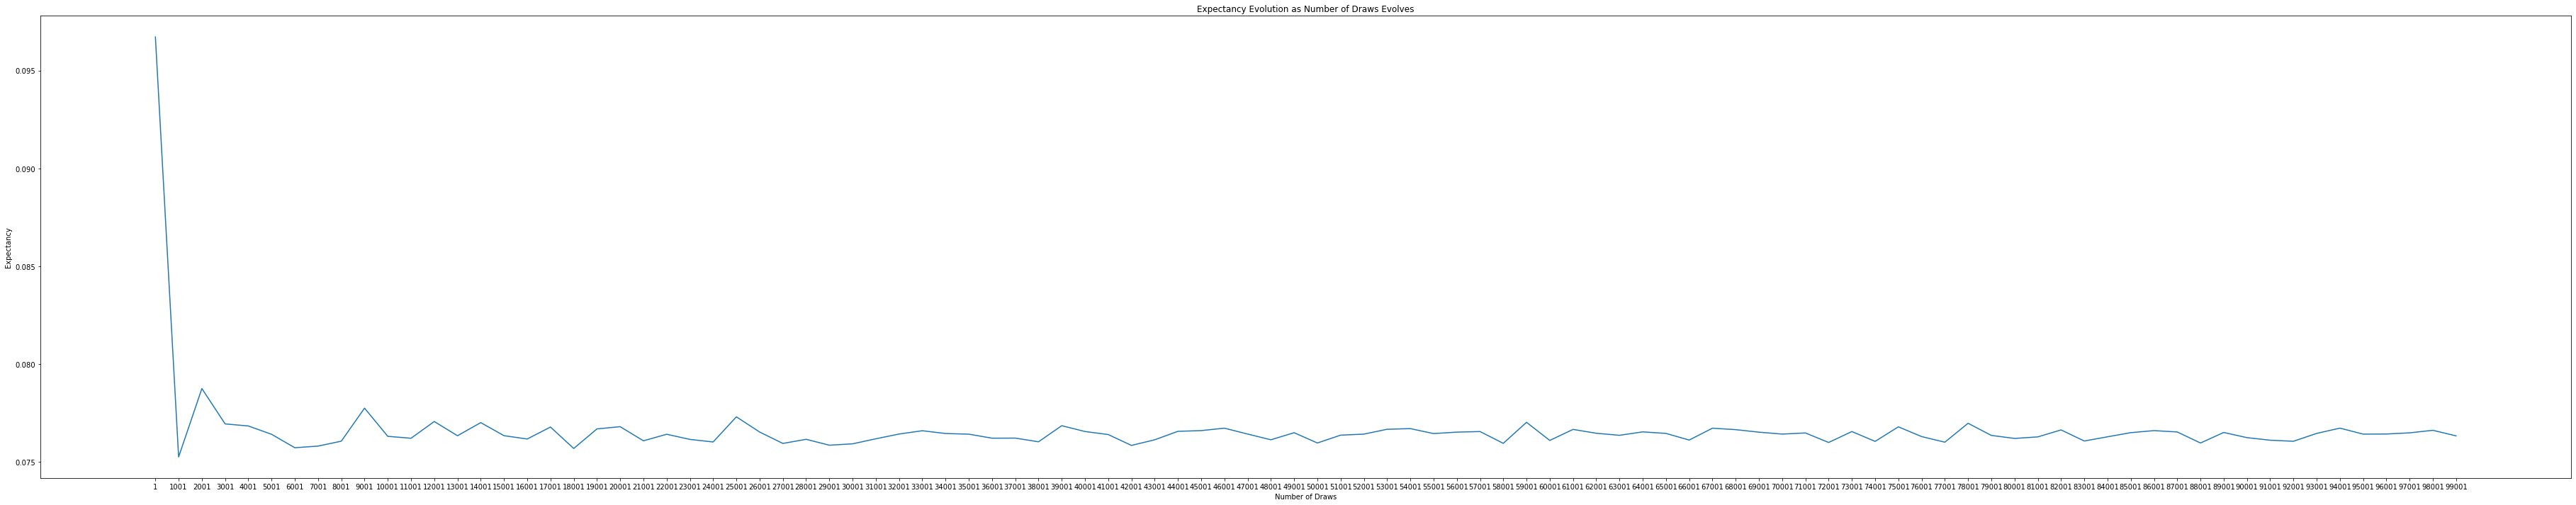

Final Expectancy for 100000 iterations:   0.07633846123180375


In [20]:
probability_triangle(maxIter=100000)